# Data Analytics ReDi - Final Project

## UFC Fighters Statistics Analysis

### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from google.colab import drive
import math
drive.mount('/content/drive')


Mounted at /content/drive


Fighter Stats Dataset

In [2]:
df_fighter_stats = pd.read_csv("/content/drive/My Drive/UFC - Data Analysis//ufc-fighters-statistics.csv")

In [3]:
df_fighter_stats.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


In [4]:
df_fighter_stats.shape

(4111, 18)

In [5]:
df_fighter_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth                                 2976 non-null   o

In [6]:
df_fighter_stats.describe()

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,4111.000000,4111.000000,4111.000000,3813.000000,4024.000000,2184.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,12.366821,5.726344,0.264413,178.234325,77.395825,181.808874,2.437516,35.542447,3.145206,42.643639,1.250586,26.299927,38.958891,0.610095
std,9.374667,5.103768,0.822373,8.888050,17.982242,10.680804,1.990903,20.398502,2.848502,22.322427,1.935716,28.700980,34.426458,1.505924
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,172.720000,65.770000,175.260000,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,5.000000,0.000000,177.800000,77.110000,182.880000,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,0.000000
75%,17.000000,8.000000,0.000000,185.420000,83.910000,190.500000,3.600000,49.000000,4.230000,58.000000,1.940000,45.000000,66.000000,0.700000
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000


In [7]:
df_fighter_stats.duplicated().sum()

0

In [8]:
df_fighter_stats.nunique()

name                                            4105
nickname                                        1784
wins                                              57
losses                                            40
draws                                             12
height_cm                                         26
weight_in_kg                                     112
reach_in_cm                                       27
stance                                             5
date_of_birth                                   2565
significant_strikes_landed_per_minute            698
significant_striking_accuracy                     83
significant_strikes_absorbed_per_minute          813
significant_strike_defence                        84
average_takedowns_landed_per_15_minutes          560
takedown_accuracy                                 83
takedown_defense                                  94
average_submissions_attempted_per_15_minutes      99
dtype: int64

In [9]:
df_fighter_stats.isnull().sum()

name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64

UFC Events Dataset

In [10]:
df_ufc_events = pd.read_csv("/content/drive/My Drive/UFC - Data Analysis//large_dataset.csv")

In [11]:
df_ufc_events.head()

,event_name,r_fighter,b_fighter,winner,weight_class,is_title_bout,gender,method,finish_round,total_rounds,...,weight_diff,reach_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff
0,UFC Fight Night: Ribas vs. Namajunas,Amanda Ribas,Rose Namajunas,Blue,Women's Flyweight,0,Women,Decision - Unanimous,5,5.0,...,0.00,2.54,0.94,-0.11,-0.01,0.04,-0.02,0.26,0.2,0.69
1,UFC Fight Night: Ribas vs. Namajunas,Karl Williams,Justin Tafa,Red,Heavyweight,0,Men,Decision - Unanimous,3,3.0,...,-13.16,12.70,-1.22,-3.32,-0.02,0.50,0.13,0.50,0.2,4.75
2,UFC Fight Night: Ribas vs. Namajunas,Edmen Shahbazyan,AJ Dobson,Red,Middleweight,0,Men,KO/TKO,1,3.0,...,0.00,-2.54,-0.69,-1.22,0.06,-0.37,-0.01,-0.02,0.3,0.57
3,UFC Fight Night: Ribas vs. Namajunas,Payton Talbott,Cameron Saaiman,Red,Bantamweight,0,Men,KO/TKO,2,3.0,...,0.00,7.62,2.73,-0.60,0.08,-0.28,0.00,0.43,-0.2,-0.91
4,UFC Fight Night: Ribas vs. Namajunas,Billy Quarantillo,Youssef Zalal,Blue,Featherweight,0,Men,Submission,2,3.0,...,0.00,-5.08,4.48,3.84,0.07,-0.11,-0.22,0.01,-0.2,-1.04


In [12]:
df_ufc_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7439 entries, 0 to 7438
Data columns (total 95 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_name              7439 non-null   object 
 1   r_fighter               7439 non-null   object 
 2   b_fighter               7439 non-null   object 
 3   winner                  7439 non-null   object 
 4   weight_class            7439 non-null   object 
 5   is_title_bout           7439 non-null   int64  
 6   gender                  7439 non-null   object 
 7   method                  7439 non-null   object 
 8   finish_round            7439 non-null   int64  
 9   total_rounds            7408 non-null   float64
 10  time_sec                7439 non-null   int64  
 11  referee                 7407 non-null   object 
 12  r_kd                    7439 non-null   int64  
 13  r_sig_str               7439 non-null   int64  
 14  r_sig_str_att           7439 non-null   

In [13]:
df_ufc_events.describe()

,is_title_bout,finish_round,total_rounds,time_sec,r_kd,r_sig_str,r_sig_str_att,r_sig_str_acc,r_str,r_str_att,...,weight_diff,reach_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff
count,7439.000000,7439.000000,7408.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,...,7439.000000,6401.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000
mean,0.055787,2.336336,3.128915,227.016669,0.249227,38.361204,83.786262,0.475335,58.199892,106.374916,...,0.171000,0.190073,0.142594,-0.171643,0.012109,0.028164,0.020909,0.037513,0.045651,0.134487
std,0.229525,1.015243,0.652739,98.169665,0.524210,32.871278,71.381806,0.165935,46.057503,79.812210,...,6.774199,8.252628,1.585610,1.691358,0.119919,0.276307,0.113455,0.292107,1.052065,1.781598
min,0.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-258.550000,-27.940000,-8.990000,-39.490000,-0.700000,-1.000000,-0.580000,-1.000000,-15.100000,-11.770000
25%,0.000000,1.000000,3.000000,149.000000,0.000000,14.000000,29.000000,0.370000,22.000000,40.000000,...,0.000000,-5.080000,-0.860000,-1.040000,-0.060000,-0.130000,-0.040000,-0.140000,-0.400000,-0.870000
50%,0.000000,3.000000,3.000000,287.000000,0.000000,31.000000,66.000000,0.470000,50.000000,94.000000,...,0.000000,0.000000,0.130000,-0.120000,0.010000,0.020000,0.010000,0.020000,0.000000,0.090000
75%,0.000000,3.000000,3.000000,300.000000,0.000000,54.000000,120.000000,0.570000,83.000000,156.000000,...,0.000000,5.080000,1.160000,0.790000,0.080000,0.190000,0.080000,0.210000,0.500000,1.160000
max,1.000000,5.000000,5.000000,1080.000000,5.000000,445.000000,744.000000,1.000000,447.000000,746.000000,...,52.160000,33.020000,18.780000,12.640000,0.830000,1.000000,0.720000,1.000000,13.800000,11.110000


In [14]:
df_ufc_events.columns

Index(['event_name', 'r_fighter', 'b_fighter', 'winner', 'weight_class',
       'is_title_bout', 'gender', 'method', 'finish_round', 'total_rounds',
       'time_sec', 'referee', 'r_kd', 'r_sig_str', 'r_sig_str_att',
       'r_sig_str_acc', 'r_str', 'r_str_att', 'r_str_acc', 'r_td', 'r_td_att',
       'r_td_acc', 'r_sub_att', 'r_rev', 'r_ctrl_sec', 'r_wins_total',
       'r_losses_total', 'r_age', 'r_height', 'r_weight', 'r_reach',
       'r_stance', 'r_SLpM_total', 'r_SApM_total', 'r_sig_str_acc_total',
       'r_td_acc_total', 'r_str_def_total', 'r_td_def_total', 'r_sub_avg',
       'r_td_avg', 'b_kd', 'b_sig_str', 'b_sig_str_att', 'b_sig_str_acc',
       'b_str', 'b_str_att', 'b_str_acc', 'b_td', 'b_td_att', 'b_td_acc',
       'b_sub_att', 'b_rev', 'b_ctrl_sec', 'b_wins_total', 'b_losses_total',
       'b_age', 'b_height', 'b_weight', 'b_reach', 'b_stance', 'b_SLpM_total',
       'b_SApM_total', 'b_sig_str_acc_total', 'b_td_acc_total',
       'b_str_def_total', 'b_td_def_total', 'b_

In [15]:
df_ufc_events.duplicated().sum()

0

In [ ]:
df_ufc_events.nunique()

In [ ]:
df_ufc_events["method"].value_counts()

In [ ]:
df_ufc_events["gender"].value_counts()

In [ ]:
df_ufc_events["finish_round"].value_counts()

UFC Events Complementary Dataset

In [16]:
df_medium_dataset = pd.read_csv("/content/drive/My Drive/UFC - Data Analysis//medium_dataset.csv")

In [ ]:
df_medium_dataset.head()

In [ ]:
df_medium_dataset.info()

In [ ]:
df_medium_dataset.isnull().sum()

event                85
date                 85
location             85
r_fighter            85
b_fighter            85
status                0
r_kd                106
b_kd                106
r_str               106
b_str               106
r_td                106
b_td                106
r_sub               106
b_sub               106
weight_class         85
method               85
method_detailed    3746
round                85
time                 85
dtype: int64

In [ ]:
df_medium_dataset.describe()

### Data Cleaning and Manipulation

Fighter Stats Dataset

In [17]:
# Convert date columns into datetime type
df_fighter_stats['date_of_birth'] = pd.to_datetime(df_fighter_stats['date_of_birth'])

In [18]:
# Dealing with missing values
# fill the column nickname null values with their own full names
df_fighter_stats['nickname'] = np.where(df_fighter_stats['nickname'].isnull(), df_fighter_stats['name'], df_fighter_stats['nickname'])

In [19]:
# Drop rows where 'date_of_birth' column has NaN values
df_fighter_stats.dropna(subset=['date_of_birth'], inplace=True)

In [20]:
# Drop rows where 'weight_in_kg'and 'height_cm' is NaN
condition = (df_fighter_stats['weight_in_kg'].isna()) & (df_fighter_stats['height_cm'].isna())
df_fighter_stats = df_fighter_stats.drop(df_fighter_stats[condition].index)

In [21]:
# Round height for better average analysis
df_fighter_stats["height_cm"] = df_fighter_stats["height_cm"].round()

In [22]:
# Fill weight_in_kg null values with the weight average of their own height
df_fighter_stats["weight_fillna"] = df_fighter_stats.groupby("height_cm")["weight_in_kg"].transform("mean")
df_fighter_stats.loc[df_fighter_stats["weight_in_kg"].isna(), "weight_in_kg"] = df_fighter_stats.loc[df_fighter_stats["weight_in_kg"].isna(), "weight_fillna"]
df_fighter_stats = df_fighter_stats.drop(columns=["weight_fillna"], axis=1)

In [24]:
# Define weight class boundaries
weight_classes = [
    ("Super Heavyweight", 120, 1000),
    ("Heavyweight", 93, 120),
    ("Light Heavyweight", 83.9, 93),
    ("Middleweight", 77.1, 83.9),
    ("Welterweight", 70.3, 77.1),
    ("Lightweight", 65.8, 70.3),
    ("Featherweight", 61.2, 65.8),
    ("Bantamweight", 56.7, 61.2),
    ("Flyweight", 52.2, 56.7),
    ("Strawweight", 0, 52.2)
]

# Create a function to determine weight class
def get_weight_class(weight):
    for weight_class, lower_bound, upper_bound in weight_classes:
        if lower_bound <= weight < upper_bound:
            return weight_class
    return "Unknown"

# Apply the function to create a new column 'weight_class'
df_fighter_stats['weight_class'] = df_fighter_stats['weight_in_kg'].apply(get_weight_class)


df_fighter_stats.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,weight_class
0,Robert Drysdale,Robert Drysdale,7,0,0,190.0,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9,Light Heavyweight
4,Collin Huckbody,All In,8,2,0,190.0,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4,Light Heavyweight
5,Gerald Strebendt,The Finishing Machine,9,7,0,175.0,70.31,NaN,Orthodox,1979-03-01,0.00,0.0,4.00,38.0,0.00,0.0,0.0,16.4,Welterweight
8,Will Kerr,Will Kerr,9,3,0,178.0,70.31,175.26,Orthodox,1982-10-21,1.91,42.0,6.22,33.0,0.00,0.0,0.0,14.3,Welterweight
9,Neil Grove,Goliath,12,8,1,198.0,120.20,NaN,Orthodox,1971-01-18,0.00,0.0,0.00,0.0,0.00,0.0,100.0,14.3,Super Heavyweight


In [25]:
# Fill height_cm null values with the height average of their own weight class
df_fighter_stats["height_fillna"] = df_fighter_stats.groupby("weight_class")["height_cm"].transform("mean")
df_fighter_stats.loc[df_fighter_stats["height_cm"].isna(), "height_cm"] = df_fighter_stats.loc[df_fighter_stats["height_cm"].isna(), "height_fillna"]
df_fighter_stats = df_fighter_stats.drop(columns=["height_fillna"], axis=1)

In [26]:
# Fill reach_in_cm null values with the average of their heights' reach
df_fighter_stats["reach_in_cm_fillna"] = df_fighter_stats.groupby("height_cm")["reach_in_cm"].transform("mean")
df_fighter_stats.loc[df_fighter_stats["reach_in_cm"].isna(), "reach_in_cm"] = df_fighter_stats.loc[df_fighter_stats["reach_in_cm"].isna(), "reach_in_cm_fillna"]
df_fighter_stats = df_fighter_stats.drop(columns=["reach_in_cm_fillna"], axis=1)

In [27]:
# Fill reach_in_cm null values with the average of their weight class' reach
df_fighter_stats["reach_in_cm_fillna"] = df_fighter_stats.groupby("weight_class")["reach_in_cm"].transform("mean")
df_fighter_stats.loc[df_fighter_stats["reach_in_cm"].isna(), "reach_in_cm"] = df_fighter_stats.loc[df_fighter_stats["reach_in_cm"].isna(), "reach_in_cm_fillna"]
df_fighter_stats = df_fighter_stats.drop(columns=["reach_in_cm_fillna"], axis=1)

In [28]:
# Fill stance null values with its mode
stance_mode = df_fighter_stats["stance"].mode()
df_fighter_stats['stance'] = np.where(df_fighter_stats['stance'].isnull(), stance_mode, df_fighter_stats['stance'])

In [ ]:
df_fighter_stats.isnull().sum()

name                                            0
nickname                                        0
wins                                            0
losses                                          0
draws                                           0
height_cm                                       0
weight_in_kg                                    0
reach_in_cm                                     0
stance                                          0
date_of_birth                                   0
significant_strikes_landed_per_minute           0
significant_striking_accuracy                   0
significant_strikes_absorbed_per_minute         0
significant_strike_defence                      0
average_takedowns_landed_per_15_minutes         0
takedown_accuracy                               0
takedown_defense                                0
average_submissions_attempted_per_15_minutes    0
weight_class                                    0
dtype: int64

In [29]:
# Calculate the total fights by summing wins, losses and draws
total_fights = (df_fighter_stats['wins'] + df_fighter_stats['losses'] + df_fighter_stats['draws'])

# Calculate the wins rate (%) in a new column
df_fighter_stats['wins%'] = round((df_fighter_stats['wins'] / total_fights)*100)

UFC Events Dataset

In [30]:
df_ufc_events = df_ufc_events.loc[:,(
        'event_name', 'r_fighter', 'b_fighter', 'winner', 'weight_class',
       'is_title_bout', 'gender', 'method', 'finish_round', 'total_rounds',
       'time_sec', 'r_kd', 'r_sig_str', 'r_sig_str_att',
       'r_sig_str_acc', 'r_str', 'r_str_att', 'r_str_acc', 'r_td', 'r_td_att',
       'r_td_acc', 'r_sub_att', 'r_rev', 'r_ctrl_sec', 'r_age','b_kd', 'b_sig_str', 'b_sig_str_att', 'b_sig_str_acc',
       'b_str', 'b_str_att', 'b_str_acc', 'b_td', 'b_td_att', 'b_td_acc',
       'b_sub_att', 'b_rev', 'b_ctrl_sec', 'b_age'
       )]

In [ ]:
df_ufc_events.isnull().sum()

event_name         0
r_fighter          0
b_fighter          0
winner             0
weight_class       0
is_title_bout      0
gender             0
method             0
finish_round       0
total_rounds      31
time_sec           0
r_kd               0
r_sig_str          0
r_sig_str_att      0
r_sig_str_acc      0
r_str              0
r_str_att          0
r_str_acc          0
r_td               0
r_td_att           0
r_td_acc           0
r_sub_att          0
r_rev              0
r_ctrl_sec         0
r_age             76
b_kd               0
b_sig_str          0
b_sig_str_att      0
b_sig_str_acc      0
b_str              0
b_str_att          0
b_str_acc          0
b_td               0
b_td_att           0
b_td_acc           0
b_sub_att          0
b_rev              0
b_ctrl_sec         0
b_age            190
dtype: int64

In [31]:
df_ufc_events.dropna(inplace=True)

In [32]:
df_ufc_events.isnull().sum()

event_name       0
r_fighter        0
b_fighter        0
winner           0
weight_class     0
is_title_bout    0
gender           0
method           0
finish_round     0
total_rounds     0
time_sec         0
r_kd             0
r_sig_str        0
r_sig_str_att    0
r_sig_str_acc    0
r_str            0
r_str_att        0
r_str_acc        0
r_td             0
r_td_att         0
r_td_acc         0
r_sub_att        0
r_rev            0
r_ctrl_sec       0
r_age            0
b_kd             0
b_sig_str        0
b_sig_str_att    0
b_sig_str_acc    0
b_str            0
b_str_att        0
b_str_acc        0
b_td             0
b_td_att         0
b_td_acc         0
b_sub_att        0
b_rev            0
b_ctrl_sec       0
b_age            0
dtype: int64

In [33]:
# Count the number of UFC fights for each fighter
r_fighter_counts = df_ufc_events['r_fighter'].value_counts()
b_fighter_counts = df_ufc_events['b_fighter'].value_counts()

# Combine the fight counts
total_ufc_fights_per_fighter = r_fighter_counts.add(b_fighter_counts, fill_value=0).sort_values(ascending=False)
total_ufc_fights_per_fighter.head(10)

Jim Miller          42.0
Andrei Arlovski     40.0
Donald Cerrone      37.0
Clay Guida          36.0
Rafael Dos Anjos    35.0
Jeremy Stephens     33.0
Demian Maia         33.0
Diego Sanchez       32.0
Neil Magny          32.0
Charles Oliveira    31.0
Name: count, dtype: float64

In [34]:
total_ufc_fights_per_fighter.describe()

count    2298.000000
mean        6.284595
std         5.797402
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        42.000000
Name: count, dtype: float64

In [35]:
# Count the number of wins for red corner fighters
red_wins = df_ufc_events[df_ufc_events['winner'] == 'Red']['r_fighter'].value_counts()

# Count the number of wins for blue corner fighters
blue_wins = df_ufc_events[df_ufc_events['winner'] == 'Blue']['b_fighter'].value_counts()

# Combine the win counts
total_ufc_fight_wins = red_wins.add(blue_wins, fill_value=0)

# Get the top X fighters based on the number of wins
total_ufc_fight_wins = total_ufc_fight_wins.sort_values(ascending=False)

total_ufc_fight_wins.head(10)

Jim Miller          26.0
Donald Cerrone      23.0
Andrei Arlovski     23.0
Demian Maia         22.0
Dustin Poirier      22.0
Neil Magny          22.0
Charles Oliveira    22.0
Jon Jones           21.0
Max Holloway        21.0
Rafael Dos Anjos    21.0
Name: count, dtype: float64

In [36]:
# Filter fighters with more than 8 fights
fighters_with_minimum_8_ufc_fights = total_ufc_fights_per_fighter[total_ufc_fights_per_fighter >= 8].sort_values(ascending=False)

# Get the fight wins rate for fighters with minimum 8 UFC fights
ufc_fighter_wins_rate_miminum_8_fights = (total_ufc_fight_wins / fighters_with_minimum_8_ufc_fights)*100

ufc_fighter_wins_rate_miminum_8_fights = ufc_fighter_wins_rate_miminum_8_fights.sort_values(ascending=False).head(15)

ufc_fighter_wins_rate_miminum_8_fights.head(15)

Khabib Nurmagomedov    100.000000
Movsar Evloev          100.000000
Jon Jones               95.454545
Islam Makhachev         93.333333
Magomed Ankalaev        90.909091
Sean O'Malley           90.909091
Georges St-Pierre       90.909091
Giga Chikadze           88.888889
Amanda Nunes            88.888889
Grant Dawson            88.888889
Demetrious Johnson      88.235294
Kyoji Horiguchi         87.500000
Leon Edwards            87.500000
Gregor Gillespie        87.500000
Tom Aspinall            87.500000
Name: count, dtype: float64

In [ ]:
# Get fighters wins rate
ufc_fighter_wins_rate = (total_ufc_fight_wins / total_ufc_fights_per_fighter)*100

ufc_fighter_wins_rate = ufc_fighter_wins_rate.sort_values(ascending=False)

ufc_fighter_wins_rate.head(10)

Michael Morales        100.0
Daniel Marcos          100.0
Khabib Nurmagomedov    100.0
Kevin Jousset          100.0
Karl Williams          100.0
Karine Silva           100.0
Paddy Pimblett         100.0
Shara Magomedov        100.0
Shavkat Rakhmonov      100.0
Morgan Charriere       100.0
Name: count, dtype: float64

In [37]:
df_ufc_events.groupby(["gender", "method"])["method"].count()

gender  method                 
Men     DQ                           20
        Decision - Majority          53
        Decision - Split            603
        Decision - Unanimous       2280
        KO/TKO                     2187
        Submission                 1269
        TKO - Doctor's Stoppage      76
Women   DQ                            1
        Decision - Majority           5
        Decision - Split             97
        Decision - Unanimous        355
        KO/TKO                      126
        Submission                  143
        TKO - Doctor's Stoppage       6
Name: method, dtype: int64

In [ ]:
df_ufc_events.groupby("is_title_bout")["finish_round"].value_counts()

is_title_bout  finish_round
0              3               3650
               1               1873
               2               1149
               5                126
               4                 22
1              5                147
               1                 89
               2                 72
               3                 72
               4                 21
Name: count, dtype: int64

In [ ]:
df_ufc_events.groupby('finish_round')['method'].value_counts()

finish_round  method                 
1             KO/TKO                     1233
              Submission                  688
              TKO - Doctor's Stoppage      26
              DQ                           14
2             KO/TKO                      701
              Submission                  468
              TKO - Doctor's Stoppage      37
              DQ                            3
3             Decision - Unanimous       2431
              Decision - Split            654
              KO/TKO                      334
              Submission                  234
              Decision - Majority          52
              TKO - Doctor's Stoppage      14
              DQ                            3
4             KO/TKO                       25
              Submission                   14
              TKO - Doctor's Stoppage       3
              DQ                            1
5             Decision - Unanimous        193
              Decision - Split            

In [38]:
#Filter the dataset to return only the fights in which ended by jugde decision and finished at 3 or 5 round
df_ufc_events = df_ufc_events.loc[~
    (((df_ufc_events['method']=='Decision - Majority')|
     (df_ufc_events['method']=='Decision - Split')|
      (df_ufc_events['method']=='Decision - Unanimous')) &
       ((df_ufc_events['finish_round']==1)|
        (df_ufc_events['finish_round']==2)|
         (df_ufc_events['finish_round']==4)))
       ]

UFC Events Complementary Dataset

In [39]:
# Drop Duplicates
df_medium_dataset = df_medium_dataset.drop_duplicates()

In [40]:
# Drop rows where 'date' column has NaN values
df_medium_dataset.dropna(subset=['date'], inplace=True)

In [41]:
# Convert date columns into datetime type
df_medium_dataset['date'] = pd.to_datetime(df_medium_dataset['date'])

### Data Visualization

Fighters Stats Dataset

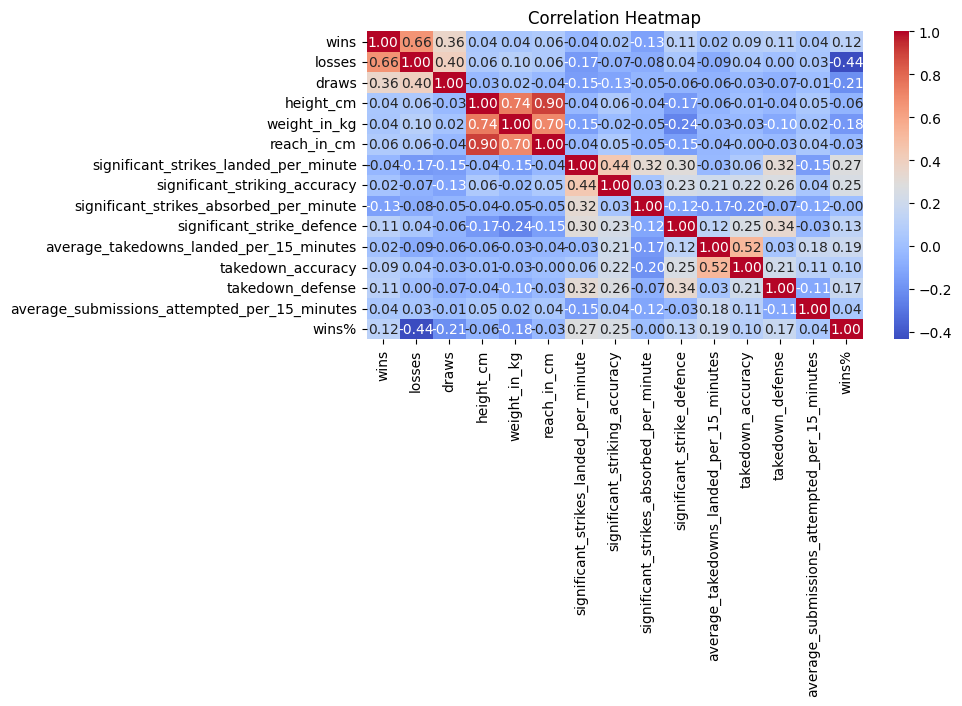

In [42]:
# Ensure all columns are numeric for the correlation calculation
numeric_df = df_fighter_stats.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 4))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

UFC Events Dataset

In [43]:
# Create a dictionary for quick lookup
birthdate_dict = df_fighter_stats.set_index('name')['date_of_birth'].to_dict()
event_date_dict = df_medium_dataset.set_index('event')['date'].to_dict()

# Function to calculate age
def calculate_age(birthdate, event_date):
    return (event_date - birthdate).days // 365

# Add age columns to ufc_events DataFrame
r_ages = []
b_ages = []

for idx, row in df_ufc_events.iterrows():
    event_date = event_date_dict.get(row['event_name'])
    r_birthdate = birthdate_dict.get(row['r_fighter'])
    b_birthdate = birthdate_dict.get(row['b_fighter'])

    if pd.notnull(event_date) and pd.notnull(r_birthdate):
        r_age = calculate_age(r_birthdate, event_date)
    else:
        r_age = None

    if pd.notnull(event_date) and pd.notnull(b_birthdate):
        b_age = calculate_age(b_birthdate, event_date)
    else:
        b_age = None

    r_ages.append(r_age)
    b_ages.append(b_age)

df_ufc_events['r_age_at_event'] = r_ages
df_ufc_events['b_age_at_event'] = b_ages

df_ufc_events.loc[:, ('event_name','r_fighter','r_age', 'r_age_at_event', 'b_fighter', 'b_age','b_age_at_event')].head()

,event_name,r_fighter,r_age,r_age_at_event,b_fighter,b_age,b_age_at_event
0,UFC Fight Night: Ribas vs. Namajunas,Amanda Ribas,30.0,30.0,Rose Namajunas,31.0,31.0
1,UFC Fight Night: Ribas vs. Namajunas,Karl Williams,34.0,34.0,Justin Tafa,30.0,30.0
2,UFC Fight Night: Ribas vs. Namajunas,Edmen Shahbazyan,26.0,26.0,AJ Dobson,32.0,32.0
3,UFC Fight Night: Ribas vs. Namajunas,Payton Talbott,25.0,25.0,Cameron Saaiman,23.0,23.0
4,UFC Fight Night: Ribas vs. Namajunas,Billy Quarantillo,35.0,35.0,Youssef Zalal,27.0,27.0


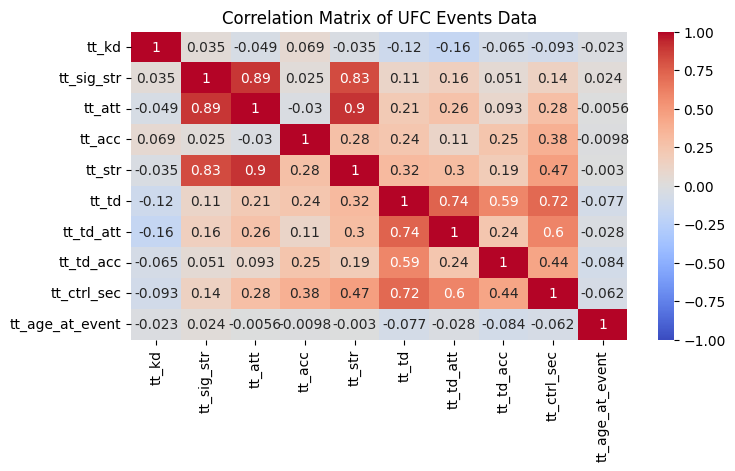

In [44]:
# Define a function to concatenate multiple pairs of columns into a single DataFrame
def combine_multiple_columns(df, column_pairs):
    combined_data = pd.DataFrame()
    for col1, col2 in column_pairs:
        combined_data['tt_'+col1.split('r_')[-1]] = pd.concat([df[col1], df[col2]], ignore_index=True)
    return combined_data

# Specify the column pairs to concatenate
column_pairs = [
    ('r_kd', 'b_kd'),
    ('r_sig_str', 'b_sig_str'),
    ('r_sig_str_att', 'b_sig_str_att',),
    ('r_sig_str_acc', 'b_sig_str_acc'),
    ('r_str','b_str'),
    ('r_str_att','b_str_att'),
    ('r_str_acc','b_str_acc'),
    ('r_td', 'b_td'),
    ('r_td_att', 'b_td_att'),
    ('r_td_acc', 'b_td_acc'),
    ('r_ctrl_sec', 'b_ctrl_sec'),
    ('r_age_at_event', 'b_age_at_event')
    ]

# Combine multiple pairs of columns into a single series
combined_data = combine_multiple_columns(df_ufc_events, column_pairs)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Plot correlation matrix
correlation_matrix = combined_data.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of UFC Events Data')
plt.show()


# Plot the heatmap
#plt.figure(figsize=(20, 16))
#heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#plt.title('Correlation Heatmap')
#plt.show()

In [45]:
# Combine r_age_at_event and b_age_at_event into a single series
combined_ages = pd.concat([df_ufc_events['r_age_at_event'], df_ufc_events['b_age_at_event']], ignore_index=True)

In [46]:
# Drop NaN values
combined_ages = combined_ages.dropna()

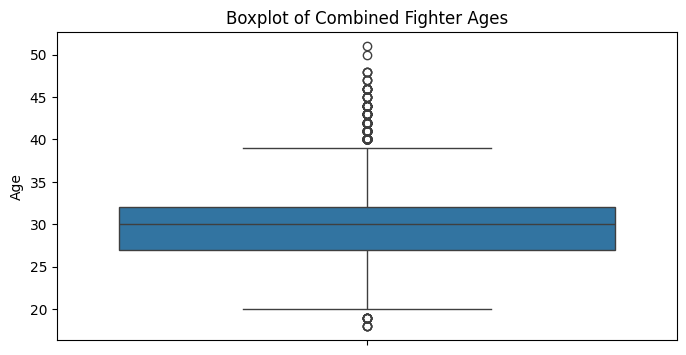

In [47]:
# Checking Outliers
# Plot the boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(y=combined_ages)
plt.title('Boxplot of Combined Fighter Ages')
plt.ylabel('Age')
plt.show()

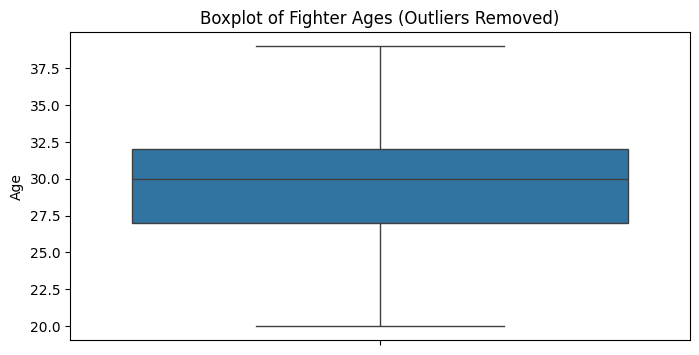

In [48]:
# Remove Age outliers for All Fights using IQR method
Q1 = combined_ages.quantile(0.25)
Q3 = combined_ages.quantile(0.75)
IQR = Q3 - Q1
filtered_ages = combined_ages[(combined_ages >= (Q1 - (1.5 * IQR))) & (combined_ages <= (Q3 + (1.5 * IQR)))]

# Plot the boxplot of Fighters Ages
plt.figure(figsize=(8, 4))
sns.boxplot(y=filtered_ages)
plt.title('Boxplot of Fighter Ages (Outliers Removed)')
plt.ylabel('Age')
plt.show()

In [49]:
# Filter only No Title Bouts fights
df_ufc_not_title_bout = df_ufc_events.loc[df_ufc_events['is_title_bout']==0]

In [50]:
# Combine r_age_at_event and b_age_at_event for Title Bout Fights into a single series
not_title_bout_combined_ages = pd.concat([df_ufc_not_title_bout['r_age_at_event'], df_ufc_not_title_bout['b_age_at_event']], ignore_index=True)

# Drop NaN values for Not Title Bout Fights
not_title_bout_combined_ages = not_title_bout_combined_ages.dropna()

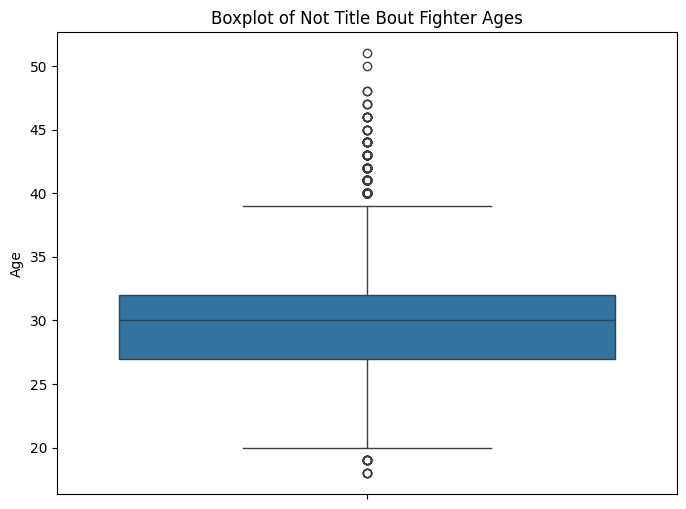

In [51]:
# Plot the Age boxplot of Title Bouts Fights
plt.figure(figsize=(8, 6))
sns.boxplot(y=not_title_bout_combined_ages)
plt.title('Boxplot of Not Title Bout Fighter Ages')
plt.ylabel('Age')
plt.show()

In [52]:
# Remove Age outliers for Title Bout Fights using IQR method
Q1 = not_title_bout_combined_ages.quantile(0.25)
Q3 = not_title_bout_combined_ages.quantile(0.75)
IQR = Q3 - Q1
not_title_bout_filtered_ages = not_title_bout_combined_ages[(not_title_bout_combined_ages >= (Q1 - (1.5 * IQR))) & (not_title_bout_combined_ages <= (Q3 + (1.5 * IQR)))]

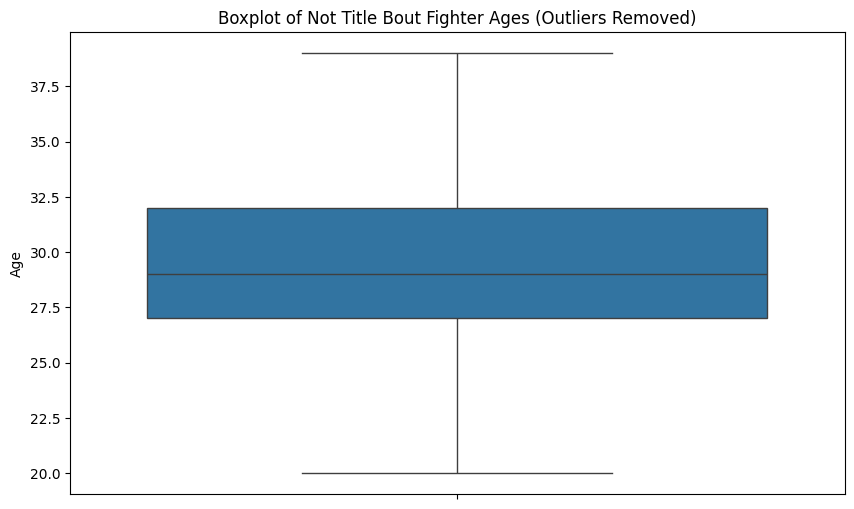

In [53]:
# Plot the Age boxplot of Not Title Bouts Fights
plt.figure(figsize=(10, 6))
sns.boxplot(y=not_title_bout_filtered_ages)
plt.title('Boxplot of Not Title Bout Fighter Ages (Outliers Removed)')
plt.ylabel('Age')
plt.show()

In [54]:
# Filter only Title Bouts fights
df_ufc_title_bout = df_ufc_events.loc[df_ufc_events['is_title_bout']==1]

In [55]:
# Combine r_age_at_event and b_age_at_event for Title Bout Fights into a single series
title_bout_combined_ages = pd.concat([df_ufc_title_bout['r_age_at_event'], df_ufc_title_bout['b_age_at_event']], ignore_index=True)

# Drop NaN values for Title Bout Fights
title_bout_combined_ages = title_bout_combined_ages.dropna()

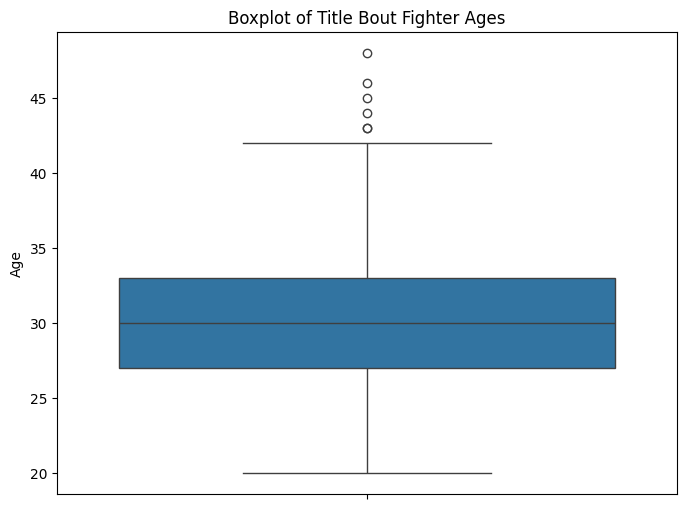

In [56]:
# Plot the Age boxplot of Title Bouts Fights
plt.figure(figsize=(8, 6))
sns.boxplot(y=title_bout_combined_ages)
plt.title('Boxplot of Title Bout Fighter Ages')
plt.ylabel('Age')
plt.show()

In [57]:
# Remove Age outliers for Title Bout Fights using IQR method
Q1 = title_bout_combined_ages.quantile(0.25)
Q3 = title_bout_combined_ages.quantile(0.75)
IQR = Q3 - Q1
title_bout_filtered_ages = title_bout_combined_ages[(title_bout_combined_ages >= (Q1 - (1.5 * IQR))) & (title_bout_combined_ages <= (Q3 + (1.5 * IQR)))]

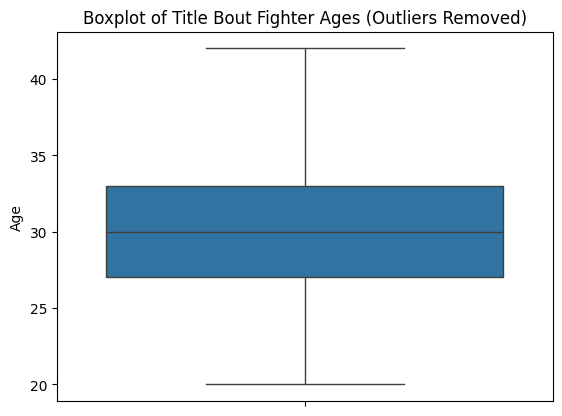

In [58]:
# Plot the Age boxplot of Title Bouts Fightsplt.figure(figsize=(10, 6))
sns.boxplot(y=title_bout_filtered_ages)
plt.title('Boxplot of Title Bout Fighter Ages (Outliers Removed)')
plt.ylabel('Age')
plt.show()

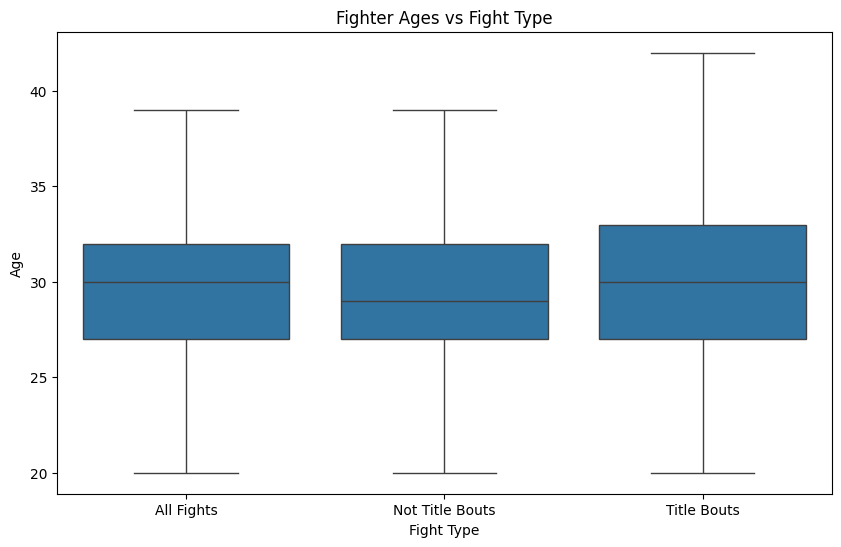

In [59]:
# Create a new DataFrame for boxplot to compare fighters age between fight types (title_bout)
boxplot_df = pd.DataFrame({
    'All Fights': filtered_ages,
    'Not Title Bouts': not_title_bout_filtered_ages,
    'Title Bouts': title_bout_filtered_ages

})

# Melt the DataFrame to long format for seaborn
boxplot_df_melted = boxplot_df.melt(var_name='Fight Type', value_name='Age')

# Plot boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fight Type', y='Age', data=boxplot_df_melted)
plt.title('Fighter Ages vs Fight Type')
plt.xlabel('Fight Type')
plt.ylabel('Age')
plt.show()

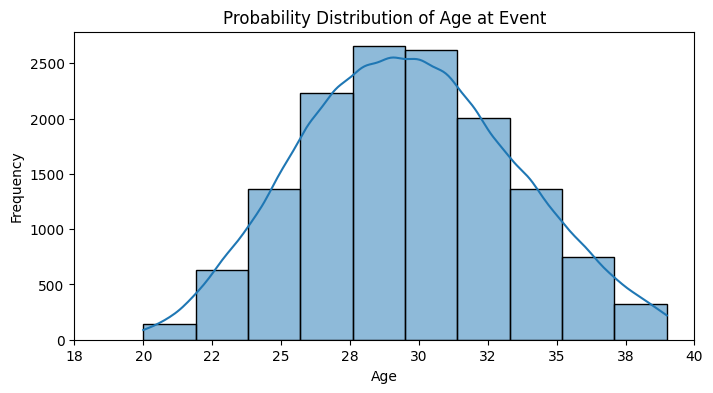

In [60]:
# Plot the Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(filtered_ages, kde=True, bins=10)

# Adjust the x-axis labels to show rounded values
ax = plt.gca()  # Get current axis
xticks = ax.get_xticks()
rounded_xticks = [round(x) for x in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(rounded_xticks)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Probability Distribution of Age at Event')

plt.show()

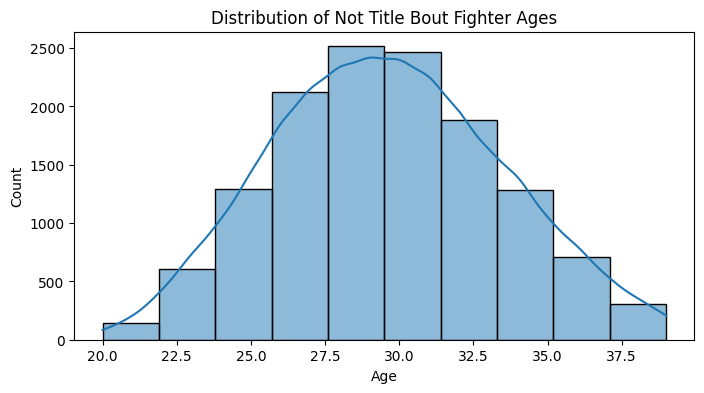

In [61]:
# Plot the Age distribution for Title Bouts Ages
plt.figure(figsize=(8, 4))
sns.histplot(not_title_bout_filtered_ages, bins=10, kde=True)
plt.title('Distribution of Not Title Bout Fighter Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

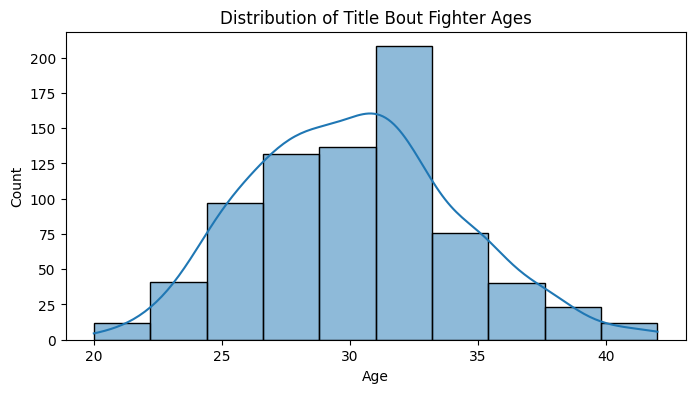

In [62]:
# Plot the Age distribution for Title Bouts Ages
plt.figure(figsize=(8, 4))
sns.histplot(title_bout_filtered_ages, bins=10, kde=True)
plt.title('Distribution of Title Bout Fighter Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

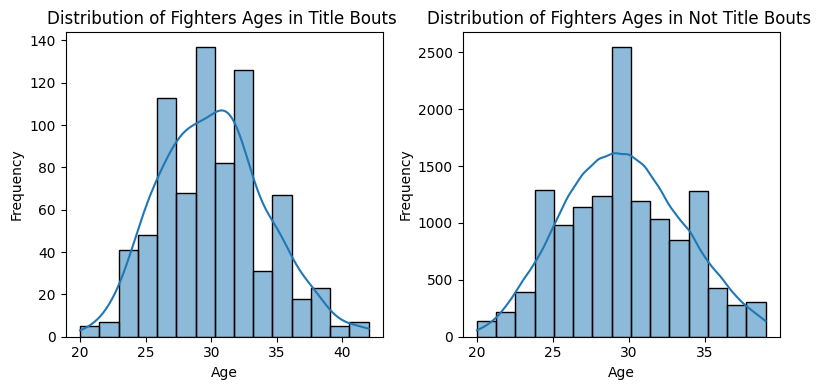

In [63]:
# Plot histograms
plt.figure(figsize=(8, 4))

# Histogram for combined ages when is title bout
plt.subplot(1, 2, 1)
sns.histplot(title_bout_filtered_ages, bins=15, kde=True)
plt.title('Distribution of Fighters Ages in Title Bouts ')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for combined ages when is not title bout
plt.subplot(1, 2, 2)
sns.histplot(not_title_bout_filtered_ages, bins=15, kde=True)
plt.title('Distribution of Fighters Ages in Not Title Bouts ')
plt.xlabel('Age')
plt.ylabel('Frequency')



plt.tight_layout()
plt.show()

In [64]:
# Calculate the count of each method
method_counts = df_ufc_events['method'].value_counts()

# Calculate the total number of occurrences
total_count = df_ufc_events['method'].count()

# Calculate the probability of each method
method_probabilities = method_counts / total_count

method_probabilities


method
Decision - Unanimous       0.364040
KO/TKO                     0.320893
Submission                 0.195893
Decision - Split           0.096837
TKO - Doctor's Stoppage    0.011376
Decision - Majority        0.008047
DQ                         0.002913
Name: count, dtype: float64

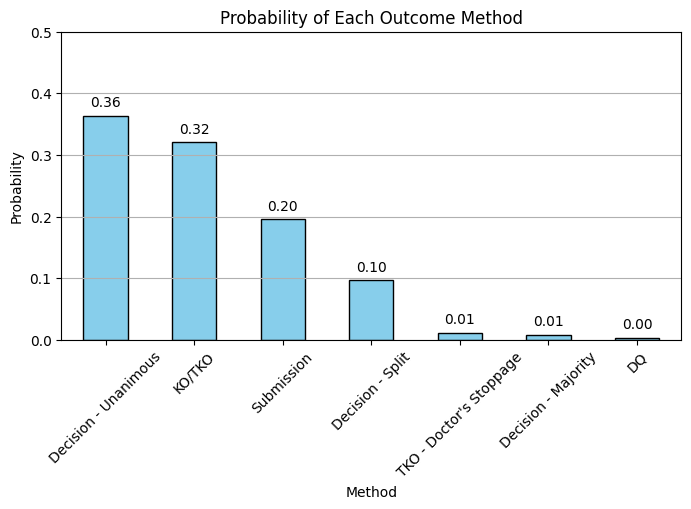

In [65]:
# Plot the probabilities
plt.figure(figsize=(8, 4))
method_probabilities.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Probability of Each Outcome Method')
plt.xlabel('Method')
plt.ylabel('Probability')
plt.ylim(0,0.5)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the probabilities on top of the bars
for i, v in enumerate(method_probabilities):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [66]:
# Calculate combined method probabilities
prob_ko_or_sub = method_probabilities.loc[['KO/TKO', 'Submission']].sum()
prob_decision = method_probabilities.loc[['Decision - Unanimous', 'Decision - Split', 'Decision - Majority']].sum()
other_methods = method_probabilities.loc[["TKO - Doctor's Stoppage", "DQ"]].sum()

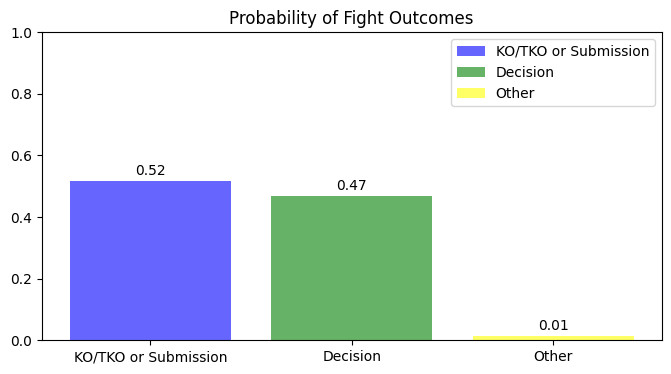

In [67]:
# Plotting
plt.figure(figsize=(8, 4))

# Bar plot for KO/TKO and Submission
plt.bar(['KO/TKO or Submission'], [prob_ko_or_sub], color='blue', alpha=0.6, label='KO/TKO or Submission')
plt.text(0, prob_ko_or_sub + 0.02, f'{prob_ko_or_sub:.2f}', ha='center')

# Bar plot for Decision methods
plt.bar(['Decision'], [prob_decision], color='green', alpha=0.6, label='Decision')
plt.text(1, prob_decision + 0.02, f'{prob_decision:.2f}', ha='center')

# Bar plot for Other methods
plt.bar(['Other'], [other_methods], color='yellow', alpha=0.6, label='Other')
plt.text(2, other_methods + 0.02, f'{other_methods:.2f}', ha='center')

# Adding labels and title
plt.title('Probability of Fight Outcomes')
plt.ylim(0, 1)
plt.legend()

# Display the plot
plt.show()

In [68]:
# Calculate the count of each method for Title Bout Fights
not_title_bout_method_counts = df_ufc_not_title_bout['method'].value_counts()

# Calculate the total number of occurrences
not_title_bout_total_count = df_ufc_not_title_bout['method'].count()

# Calculate the probability of each method
not_title_bout_method_probabilities = not_title_bout_method_counts / not_title_bout_total_count

not_title_bout_method_probabilities

method
Decision - Unanimous       0.366574
KO/TKO                     0.317962
Submission                 0.195477
Decision - Split           0.098252
TKO - Doctor's Stoppage    0.010868
Decision - Majority        0.007931
DQ                         0.002937
Name: count, dtype: float64

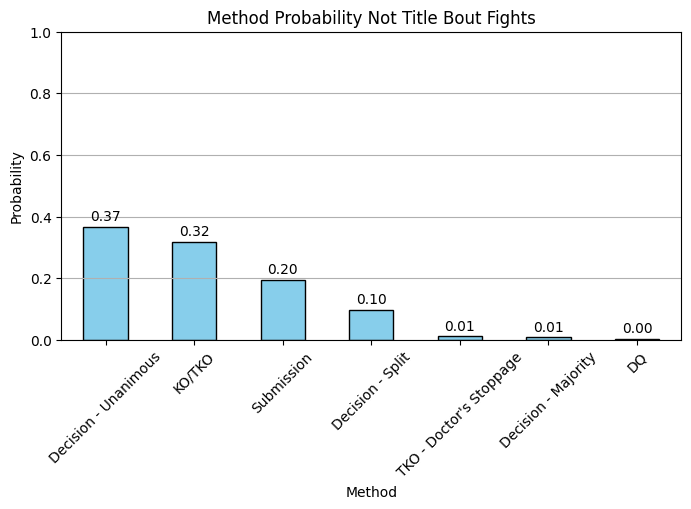

In [69]:
# Plot Method probabilities for Not Title Bout Fights
plt.figure(figsize=(8, 4))
not_title_bout_method_probabilities.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Method Probability Not Title Bout Fights')
plt.xlabel('Method')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the probabilities on top of the bars
for i, v in enumerate(not_title_bout_method_probabilities):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [70]:
# Calculate Combined Method probabilities for Not Title Bout Fights
not_title_bout_prob_ko_or_sub = not_title_bout_method_probabilities.loc[['KO/TKO', 'Submission']].sum()
not_title_bout_prob_decision = not_title_bout_method_probabilities.loc[['Decision - Unanimous', 'Decision - Split', 'Decision - Majority']].sum()
not_title_bout_other_methods = not_title_bout_method_probabilities.loc[["TKO - Doctor's Stoppage", "DQ"]].sum()

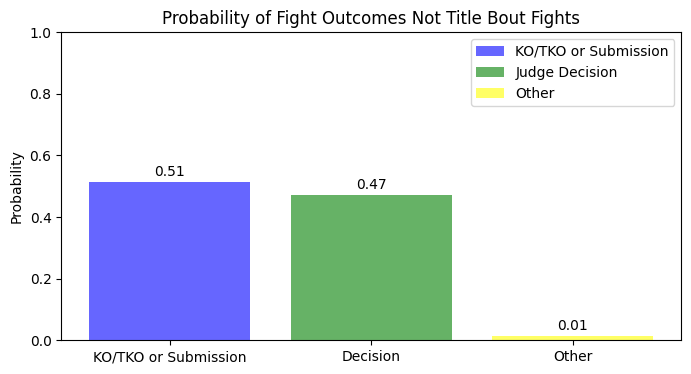

In [71]:
# Plotting
plt.figure(figsize=(8, 4))

# Bar plot for KO/TKO and Submission
plt.bar(['KO/TKO or Submission'], [not_title_bout_prob_ko_or_sub], color='blue', alpha=0.6, label='KO/TKO or Submission')
plt.text(0, not_title_bout_prob_ko_or_sub + 0.02, f'{not_title_bout_prob_ko_or_sub:.2f}', ha='center')

# Bar plot for Decision methods
plt.bar(['Decision'], [not_title_bout_prob_decision], color='green', alpha=0.6, label='Judge Decision')
plt.text(1, not_title_bout_prob_decision + 0.02, f'{not_title_bout_prob_decision:.2f}', ha='center')

# Bar plot for Other methods
plt.bar(['Other'], [not_title_bout_other_methods], color='yellow', alpha=0.6, label='Other')
plt.text(2, not_title_bout_other_methods + 0.02, f'{not_title_bout_other_methods:.2f}', ha='center')

# Adding labels and title
plt.title('Probability of Fight Outcomes Not Title Bout Fights')
plt.ylabel('Probability')
plt.ylim(0, 1)  # Adjust y-axis limit based on your data
plt.legend()

# Display the plot
plt.show()

In [72]:
# Calculate the count of each method for Title Bout Fights
title_bout_method_counts = df_ufc_title_bout['method'].value_counts()

# Calculate the total number of occurrences
title_bout_total_count = df_ufc_title_bout['method'].count()

# Calculate the probability of each method
title_bout_method_probabilities = title_bout_method_counts / title_bout_total_count

title_bout_method_probabilities


method
KO/TKO                     0.370927
Decision - Unanimous       0.320802
Submission                 0.203008
Decision - Split           0.072682
TKO - Doctor's Stoppage    0.020050
Decision - Majority        0.010025
DQ                         0.002506
Name: count, dtype: float64

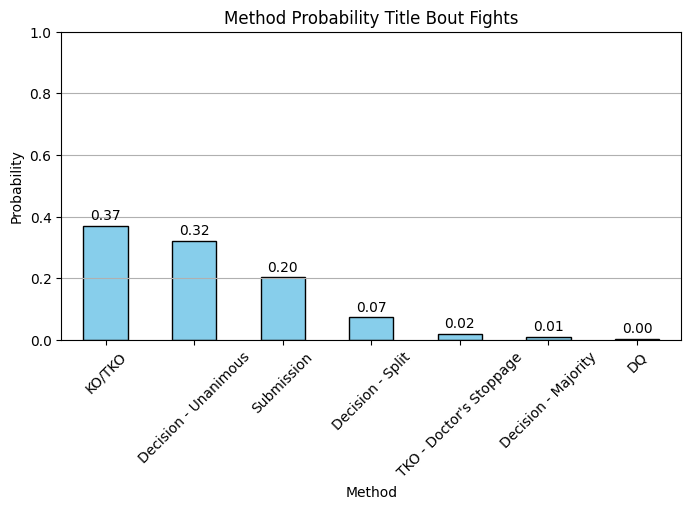

In [73]:
# Plot Method probabilities for Title Bout Fights
plt.figure(figsize=(8, 4))
title_bout_method_probabilities.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Method Probability Title Bout Fights')
plt.xlabel('Method')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the probabilities on top of the bars
for i, v in enumerate(title_bout_method_probabilities):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [74]:
# Calculate Combined Method probabilities for Title Bout Fights
title_bout_prob_ko_or_sub = title_bout_method_probabilities.loc[['KO/TKO', 'Submission']].sum()
title_bout_prob_decision = title_bout_method_probabilities.loc[['Decision - Unanimous', 'Decision - Split', 'Decision - Majority']].sum()
title_bout_other_methods = title_bout_method_probabilities.loc[["TKO - Doctor's Stoppage", "DQ"]].sum()

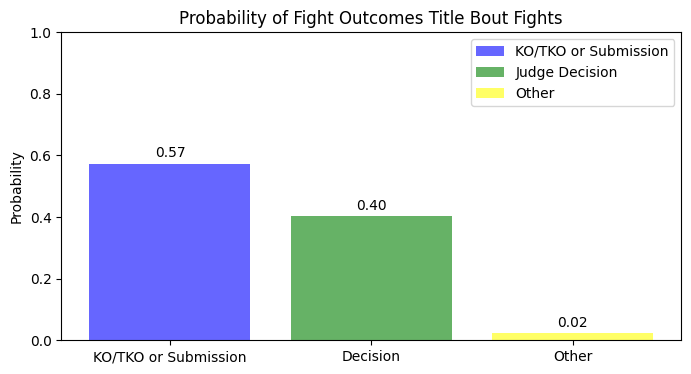

In [75]:
# Plotting
plt.figure(figsize=(8, 4))

# Bar plot for KO/TKO and Submission
plt.bar(['KO/TKO or Submission'], [title_bout_prob_ko_or_sub], color='blue', alpha=0.6, label='KO/TKO or Submission')
plt.text(0, title_bout_prob_ko_or_sub + 0.02, f'{title_bout_prob_ko_or_sub:.2f}', ha='center')

# Bar plot for Decision methods
plt.bar(['Decision'], [title_bout_prob_decision], color='green', alpha=0.6, label='Judge Decision')
plt.text(1, title_bout_prob_decision + 0.02, f'{title_bout_prob_decision:.2f}', ha='center')

# Bar plot for Other methods
plt.bar(['Other'], [title_bout_other_methods], color='yellow', alpha=0.6, label='Other')
plt.text(2, title_bout_other_methods + 0.02, f'{title_bout_other_methods:.2f}', ha='center')

# Adding labels and title
plt.title('Probability of Fight Outcomes Title Bout Fights')
plt.ylabel('Probability')
plt.ylim(0, 1)  # Adjust y-axis limit based on your data
plt.legend()

# Display the plot
plt.show()

In [76]:
# Calculate combined method probabilities
prob_ko = method_probabilities.loc[['KO/TKO']].sum()
prob_sub = method_probabilities.loc[['Submission']].sum()
prob_decision = method_probabilities.loc[['Decision - Unanimous', 'Decision - Split', 'Decision - Majority']].sum()
other_methods = method_probabilities.loc[["TKO - Doctor's Stoppage", "DQ"]].sum()

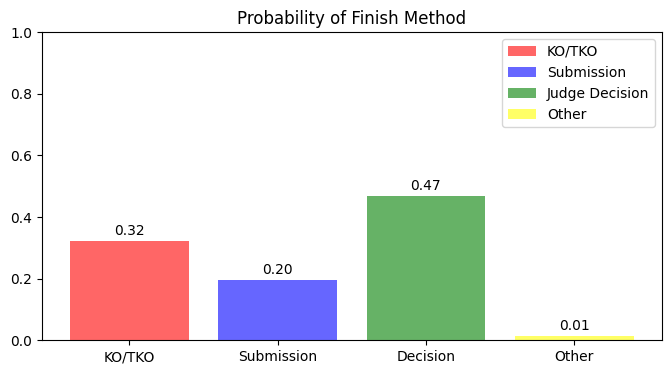

In [77]:
# Plotting
plt.figure(figsize=(8, 4))

# Bar plot for KO/TKO and Submission
plt.bar(['KO/TKO'], [prob_ko], color='red', alpha=0.6, label='KO/TKO')
plt.text(0, prob_ko + 0.02, f'{prob_ko:.2f}', ha='center')

# Bar plot for KO/TKO and Submission
plt.bar(['Submission'], [prob_sub], color='blue', alpha=0.6, label='Submission')
plt.text(1, prob_sub + 0.02, f'{prob_sub:.2f}', ha='center')

# Bar plot for Decision methods
plt.bar(['Decision'], [prob_decision], color='green', alpha=0.6, label='Judge Decision')
plt.text(2, prob_decision + 0.02, f'{prob_decision:.2f}', ha='center')

# Bar plot for Other methods
plt.bar(['Other'], [other_methods], color='yellow', alpha=0.6, label='Other')
plt.text(3, other_methods + 0.02, f'{other_methods:.2f}', ha='center')

# Adding labels and title
plt.title('Probability of Finish Method')
plt.ylim(0, 1)  # Adjust y-axis limit based on your data
plt.legend()

# Display the plot
plt.show()

In [78]:
# Calculate Combined Method probabilities for Title Bout Fights
not_title_bout_prob_ko = not_title_bout_method_probabilities.loc[['KO/TKO']].sum()
not_title_bout_prob_sub = not_title_bout_method_probabilities.loc[['Submission']].sum()
not_title_bout_prob_decision = not_title_bout_method_probabilities.loc[['Decision - Unanimous', 'Decision - Split', 'Decision - Majority']].sum()
not_title_bout_other_methods = not_title_bout_method_probabilities.loc[["TKO - Doctor's Stoppage", "DQ"]].sum()

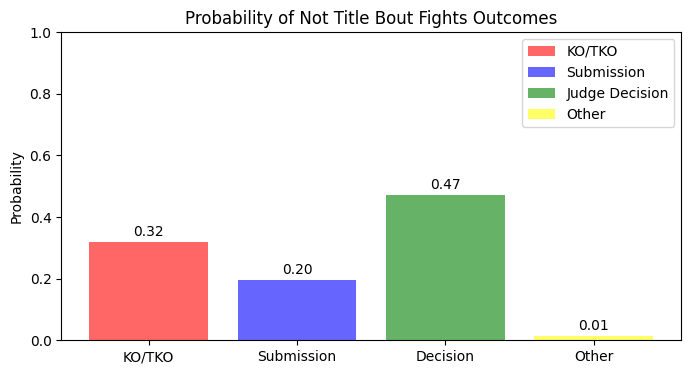

In [79]:
# Plotting
plt.figure(figsize=(8, 4))

# Bar plot for KO/TKO and Submission
plt.bar(['KO/TKO'], [not_title_bout_prob_ko], color='red', alpha=0.6, label='KO/TKO')
plt.text(0, not_title_bout_prob_ko + 0.02, f'{not_title_bout_prob_ko:.2f}', ha='center')

# Bar plot for KO/TKO and Submission
plt.bar(['Submission'], [not_title_bout_prob_sub], color='blue', alpha=0.6, label='Submission')
plt.text(1, not_title_bout_prob_sub + 0.02, f'{not_title_bout_prob_sub:.2f}', ha='center')

# Bar plot for Decision methods
plt.bar(['Decision'], [not_title_bout_prob_decision], color='green', alpha=0.6, label='Judge Decision')
plt.text(2, not_title_bout_prob_decision + 0.02, f'{not_title_bout_prob_decision:.2f}', ha='center')

# Bar plot for Other methods
plt.bar(['Other'], [not_title_bout_other_methods], color='yellow', alpha=0.6, label='Other')
plt.text(3, not_title_bout_other_methods + 0.02, f'{not_title_bout_other_methods:.2f}', ha='center')

# Adding labels and title
plt.title('Probability of Not Title Bout Fights Outcomes')
plt.ylabel('Probability')
plt.ylim(0, 1)  # Adjust y-axis limit based on your data
plt.legend()

# Display the plot
plt.show()

In [80]:
# Calculate Combined Method probabilities for Title Bout Fights
title_bout_prob_ko = title_bout_method_probabilities.loc[['KO/TKO']].sum()
title_bout_prob_sub = title_bout_method_probabilities.loc[['Submission']].sum()
title_bout_prob_decision = title_bout_method_probabilities.loc[['Decision - Unanimous', 'Decision - Split', 'Decision - Majority']].sum()
title_bout_other_methods = title_bout_method_probabilities.loc[["TKO - Doctor's Stoppage", "DQ"]].sum()

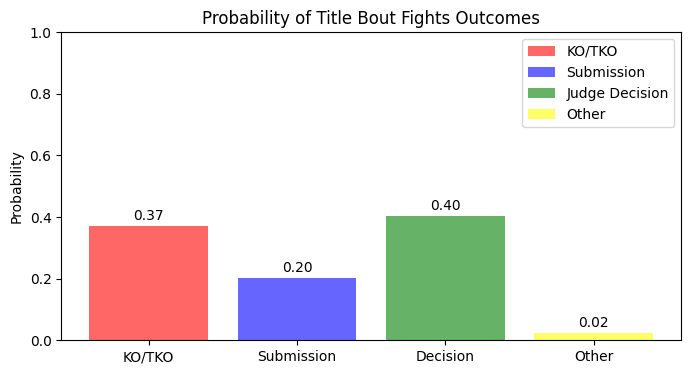

In [81]:
# Plotting
plt.figure(figsize=(8, 4))

# Bar plot for KO/TKO and Submission
plt.bar(['KO/TKO'], [title_bout_prob_ko], color='red', alpha=0.6, label='KO/TKO')
plt.text(0, title_bout_prob_ko + 0.02, f'{title_bout_prob_ko:.2f}', ha='center')

# Bar plot for KO/TKO and Submission
plt.bar(['Submission'], [title_bout_prob_sub], color='blue', alpha=0.6, label='Submission')
plt.text(1, title_bout_prob_sub + 0.02, f'{title_bout_prob_sub:.2f}', ha='center')

# Bar plot for Decision methods
plt.bar(['Decision'], [title_bout_prob_decision], color='green', alpha=0.6, label='Judge Decision')
plt.text(2, title_bout_prob_decision + 0.02, f'{title_bout_prob_decision:.2f}', ha='center')

# Bar plot for Other methods
plt.bar(['Other'], [title_bout_other_methods], color='yellow', alpha=0.6, label='Other')
plt.text(3, title_bout_other_methods + 0.02, f'{title_bout_other_methods:.2f}', ha='center')

# Adding labels and title
plt.title('Probability of Title Bout Fights Outcomes')
plt.ylabel('Probability')
plt.ylim(0, 1)  # Adjust y-axis limit based on your data
plt.legend()

# Display the plot
plt.show()

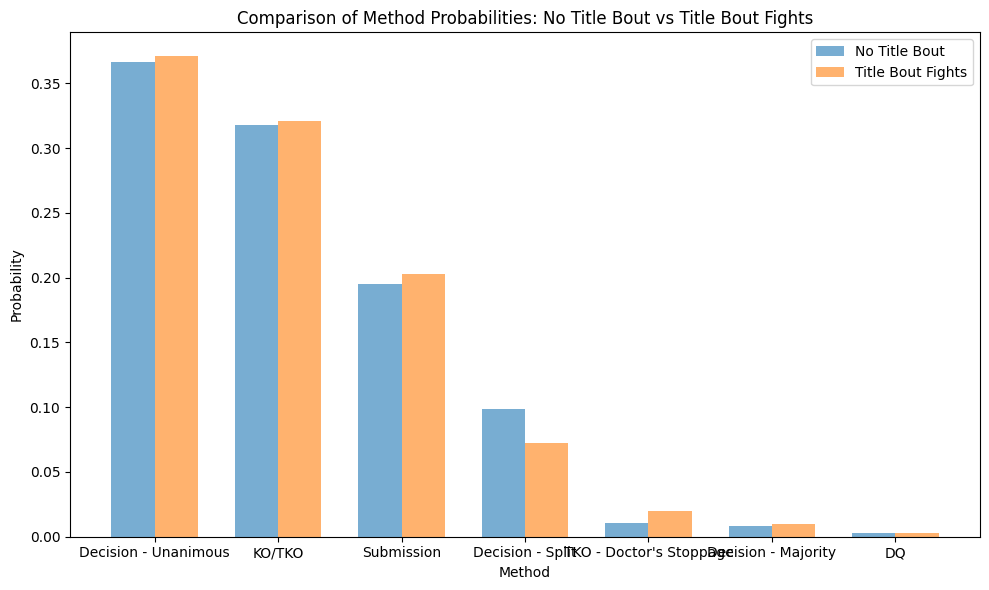

In [82]:
# Function to plot probabilities
def plot_probabilities(not_title_bout_method_probabilities, title_bout_method_probabilities):
    # Create subplots
    fig, ax = plt.subplots(figsize=(10, 6))

    # Bar width
    bar_width = 0.35

    # X-axis positions for bars
    index = range(len(not_title_bout_method_probabilities))

    # Plot bars for all fights
    rects1 = ax.bar(index, not_title_bout_method_probabilities.values, bar_width, label='No Title Bout', alpha=0.6)

    # Plot bars for title bout fights
    rects2 = ax.bar([i + bar_width for i in index], title_bout_method_probabilities.values, bar_width, label='Title Bout Fights', alpha=0.6)

    # Add labels, title, and legend
    ax.set_xlabel('Method')
    ax.set_ylabel('Probability')
    ax.set_title('Comparison of Method Probabilities: No Title Bout vs Title Bout Fights')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(not_title_bout_method_probabilities.index)
    ax.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function to plot probabilities
plot_probabilities(not_title_bout_method_probabilities, title_bout_method_probabilities)

In [83]:
# Create a DataFrame for not title bout fights and title bout fights with combined methods and its probabilities
df_not_title_bout_method_prob = pd.DataFrame({
    'Method': ['KO/TKO or Submission', 'Decision', 'Other'],
    'Probability': [not_title_bout_prob_ko_or_sub, not_title_bout_prob_decision, not_title_bout_other_methods]
})

df_title_bout_method_prob = pd.DataFrame({
    'Method': ['KO/TKO or Submission', 'Decision', 'Other'],
    'Probability': [title_bout_prob_ko_or_sub, title_bout_prob_decision, title_bout_other_methods]
})

df_title_bout_method_prob = pd.DataFrame(df_title_bout_method_prob).set_index('Method')
df_not_title_bout_method_prob = pd.DataFrame(df_not_title_bout_method_prob).set_index('Method')


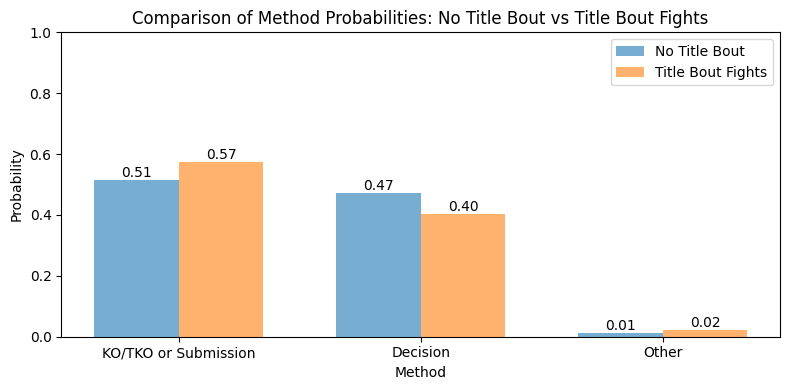

In [84]:
# Function to plot probabilities
def plot_probabilities(not_title_bout_method_probabilities, title_bout_method_probabilities):
    # Create subplots
    fig, ax = plt.subplots(figsize=(8, 4))

    # Bar width
    bar_width = 0.35

    # X-axis positions for bars
    index = range(len(not_title_bout_method_probabilities))

    # Plot bars for all fights
    rects1 = ax.bar(index, not_title_bout_method_probabilities.values, bar_width, label='No Title Bout', alpha=0.6)

    # Plot bars for title bout fights
    rects2 = ax.bar([i + bar_width for i in index], title_bout_method_probabilities.values, bar_width, label='Title Bout Fights', alpha=0.6)

    # Add labels, title, and legend
    ax.set_xlabel('Method')
    ax.set_ylabel('Probability')
    ax.set_title('Comparison of Method Probabilities: No Title Bout vs Title Bout Fights')
    ax.set_ylim(0,1)
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(not_title_bout_method_probabilities.index)
    ax.legend()

    # Add value labels on top of the bars
    for rect in rects1:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

    for rect in rects2:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function to plot probabilities
plot_probabilities(df_not_title_bout_method_prob['Probability'], df_title_bout_method_prob['Probability'])

In [86]:
# Calculate the count of each method
round_counts = df_ufc_events['finish_round'].value_counts()

# Calculate the total number of occurrences
total_round_count = df_ufc_events['finish_round'].count()

# Calculate the probability of each method
finish_round_probabilities = round_counts / total_round_count

finish_round_probabilities

finish_round
3    0.516371
1    0.272059
2    0.167730
5    0.037875
4    0.005966
Name: count, dtype: float64

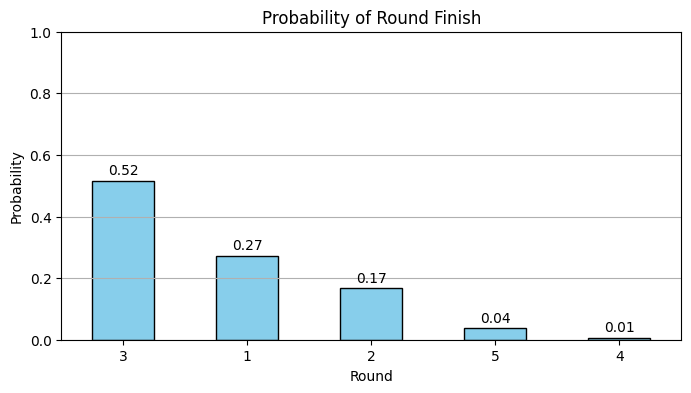

In [87]:
# Plot the probabilities
plt.figure(figsize=(8, 4))
finish_round_probabilities.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Probability of Round Finish')
plt.xlabel('Round')
plt.ylabel('Probability')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Display the probabilities on top of the bars
for i, v in enumerate(finish_round_probabilities):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [98]:
# Create a column with the combined finish methods
df_ufc_events['combined_method'] = df_ufc_events['method'].replace({
    'KO/TKO': 'KO/TKO',
    'Submission': 'Submission',
    "TKO - Doctor's Stoppage": 'Other',
    'Decision - Unanimous': 'Decision',
    'Decision - Split': 'Decision',
    'Decision - Majority': 'Decision',
    'DQ': 'Other'

})

In [99]:
# Calculate the probability of rounds and methods happening
# Create a contingency table of method counts per round
contingency_table = pd.crosstab(df_ufc_events['finish_round'], df_ufc_events['combined_method'])

# Calculate the total count of each round
round_totals = contingency_table.sum(axis=1)

# Calculate the conditional probability of each method given the round
conditional_probabilities = contingency_table.div(round_totals, axis=0)

# Display the conditional probabilities
print(conditional_probabilities)



combined_method  Decision    KO/TKO     Other  Submission
finish_round                                             
1                0.000000  0.628761  0.020398    0.350841
2                0.000000  0.579818  0.033085    0.387097
3                0.842826  0.089737  0.004567    0.062869
4                0.000000  0.581395  0.093023    0.325581
5                0.890110  0.073260  0.007326    0.029304


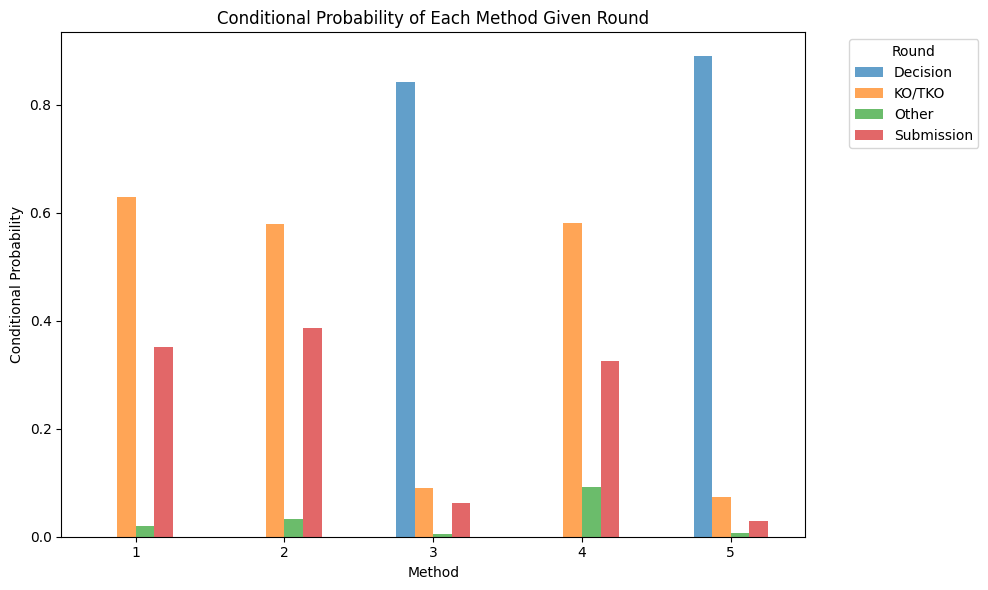

In [100]:
# Plotting
ax = conditional_probabilities.plot(kind='bar', stacked=False, figsize=(10, 6), alpha=0.7)

# Adding labels and title
ax.set_xlabel('Method')
ax.set_ylabel('Conditional Probability')
plt.xticks(rotation=0)
ax.set_title('Conditional Probability of Each Method Given Round')
plt.legend(title='Round', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [90]:
# Calculate the count of each method
title_bout_round_counts = df_ufc_title_bout['finish_round'].value_counts()

# Calculate the total number of occurrences
title_bout_total_round_count = df_ufc_title_bout['finish_round'].count()

# Calculate the probability of each method
title_bout_finish_round_probabilities = title_bout_round_counts / title_bout_total_round_count

title_bout_finish_round_probabilities

finish_round
5    0.368421
1    0.223058
3    0.180451
2    0.175439
4    0.052632
Name: count, dtype: float64

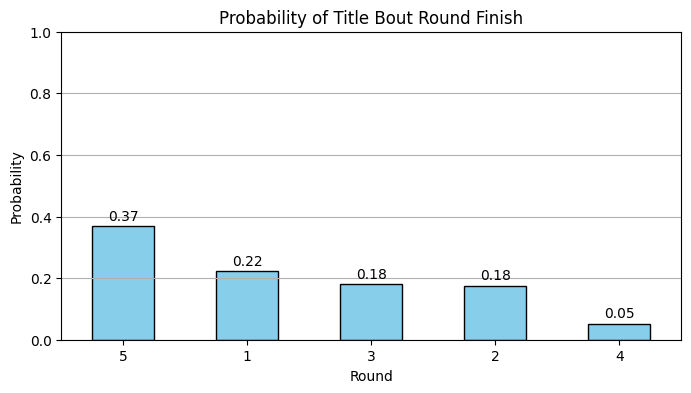

In [91]:
# Plot the probabilities
plt.figure(figsize=(8, 4))
title_bout_finish_round_probabilities.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Probability of Title Bout Round Finish')
plt.xlabel('Round')
plt.ylabel('Probability')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Display the probabilities on top of the bars
for i, v in enumerate(title_bout_finish_round_probabilities):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [92]:
# Calculate the probability of rounds and methods happening
# Create a contingency table of method counts per round
title_bout_contingency_table = pd.crosstab(df_ufc_title_bout['finish_round'], df_ufc_title_bout['method'])

# Calculate the total count of each round
title_bout_round_totals = title_bout_contingency_table.sum(axis=1)

# Calculate the conditional probability of each method given the round
title_bout_conditional_probabilities = title_bout_contingency_table.div(title_bout_round_totals, axis=0)

# Display the conditional probabilities
print(title_bout_conditional_probabilities)

method              DQ  Decision - Majority  Decision - Split  \
finish_round                                                    
1             0.000000             0.000000          0.000000   
2             0.000000             0.000000          0.000000   
3             0.000000             0.013889          0.125000   
4             0.047619             0.000000          0.000000   
5             0.000000             0.020408          0.136054   

method        Decision - Unanimous    KO/TKO  Submission  \
finish_round                                               
1                         0.000000  0.674157    0.303371   
2                         0.000000  0.600000    0.385714   
3                         0.305556  0.319444    0.208333   
4                         0.000000  0.571429    0.285714   
5                         0.721088  0.074830    0.040816   

method        TKO - Doctor's Stoppage  
finish_round                           
1                            0.022472  
2  

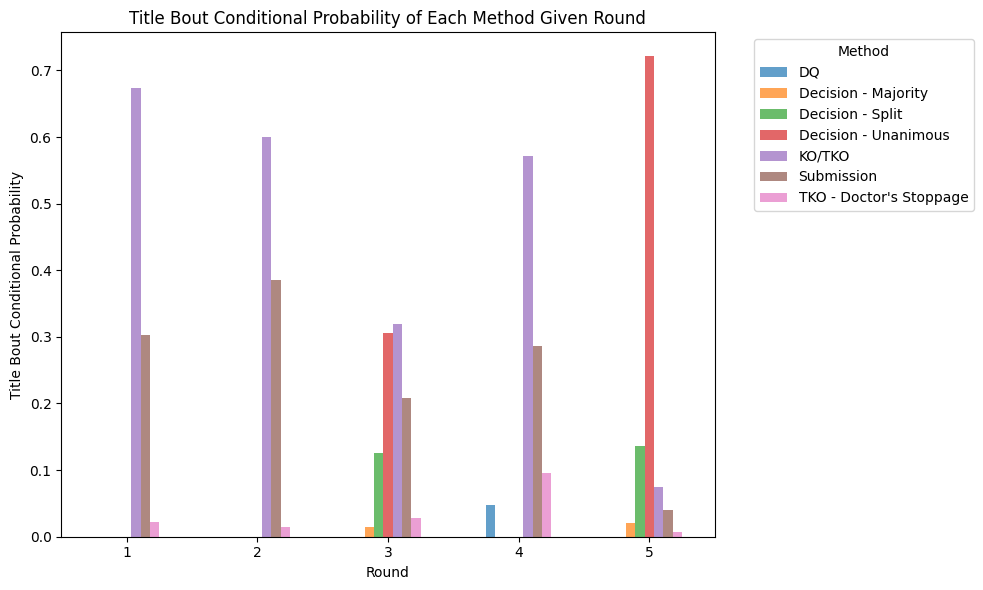

In [93]:
# Plotting
ax = title_bout_conditional_probabilities.plot(kind='bar', stacked=False, figsize=(10, 6), alpha=0.7)

# Adding labels and title
ax.set_xlabel('Round')
ax.set_ylabel('Title Bout Conditional Probability')
plt.xticks(rotation=0)
ax.set_title('Title Bout Conditional Probability of Each Method Given Round')
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [94]:
# Calculate the count of each method
not_title_bout_round_counts = df_ufc_not_title_bout['finish_round'].value_counts()

# Calculate the total number of occurrences
not_title_bout_total_round_count = df_ufc_not_title_bout['finish_round'].count()

# Calculate the probability of each method
not_title_bout_finish_round_probabilities = not_title_bout_round_counts / not_title_bout_total_round_count

not_title_bout_finish_round_probabilities

finish_round
3    0.536055
1    0.274930
2    0.167279
5    0.018505
4    0.003231
Name: count, dtype: float64

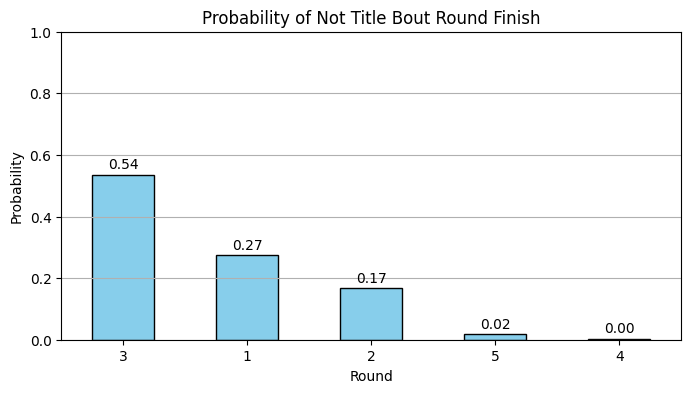

In [95]:
# Plot the probabilities
plt.figure(figsize=(8, 4))
not_title_bout_finish_round_probabilities.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Probability of Not Title Bout Round Finish')
plt.xlabel('Round')
plt.ylabel('Probability')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Display the probabilities on top of the bars
for i, v in enumerate(not_title_bout_finish_round_probabilities):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [96]:
# Calculate the probability of rounds and methods happening
# Create a contingency table of method counts per round
not_title_bout_contingency_table = pd.crosstab(df_ufc_not_title_bout['finish_round'], df_ufc_not_title_bout['method'])

# Calculate the total count of each round
not_title_bout_round_totals = not_title_bout_contingency_table.sum(axis=1)

# Calculate the conditional probability of each method given the round
not_title_bout_conditional_probabilities = not_title_bout_contingency_table.div(not_title_bout_round_totals, axis=0)

# Display the conditional probabilities
print(not_title_bout_conditional_probabilities)

method              DQ  Decision - Majority  Decision - Split  \
finish_round                                                    
1             0.007479             0.000000          0.000000   
2             0.002634             0.000000          0.000000   
3             0.000822             0.013973          0.176712   
4             0.000000             0.000000          0.000000   
5             0.000000             0.023810          0.190476   

method        Decision - Unanimous    KO/TKO  Submission  \
finish_round                                               
1                         0.000000  0.626603    0.353098   
2                         0.000000  0.578578    0.387182   
3                         0.660000  0.085205    0.060000   
4                         0.000000  0.590909    0.363636   
5                         0.690476  0.071429    0.015873   

method        TKO - Doctor's Stoppage  
finish_round                           
1                            0.012821  
2  

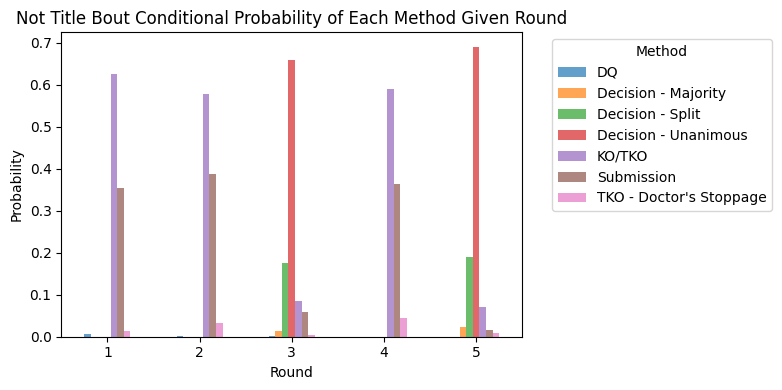

In [97]:
# Plotting
ax = not_title_bout_conditional_probabilities.plot(kind='bar', stacked=False, figsize=(8, 4), alpha=0.7)

# Adding labels and title
ax.set_xlabel('Round')
ax.set_ylabel('Probability')
plt.xticks(rotation=0)
ax.set_title('Not Title Bout Conditional Probability of Each Method Given Round')
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [101]:
# Calculate the probability of rounds and methods happening
# Create a contingency table of method counts per round
df_ufc_events_contingency_table = pd.crosstab(df_ufc_events['combined_method'], df_ufc_events['finish_round'])

# Calculate the total count of each round
df_ufc_events_round_totals = df_ufc_events_contingency_table.sum(axis=1)

# Calculate the conditional probability of each method given the round
df_ufc_events_conditional_probabilities = df_ufc_events_contingency_table.div(df_ufc_events_round_totals, axis=0)

# Display the conditional probabilities
print(df_ufc_events_conditional_probabilities)

finish_round            1         2         3         4         5
combined_method                                                  
Decision         0.000000  0.000000  0.928107  0.000000  0.071893
KO/TKO           0.533074  0.303070  0.144401  0.010808  0.008647
Other            0.388350  0.388350  0.165049  0.038835  0.019417
Submission       0.487252  0.331445  0.165722  0.009915  0.005666


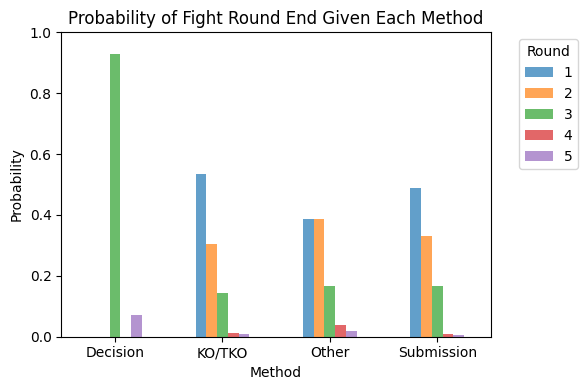

In [102]:
# Plotting
ax = df_ufc_events_conditional_probabilities.plot(kind='bar', stacked=False, figsize=(6, 4), alpha=0.7)

# Adding labels and title
ax.set_xlabel('Method')
ax.set_ylabel('Probability')
ax.set_ylim(0,1)
plt.xticks(rotation=0)
ax.set_title('Probability of Fight Round End Given Each Method')
plt.legend(title='Round', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [105]:
# Combine methods
df_ufc_events['combined_method'] = df_ufc_events['method'].replace({
    'KO/TKO': 'KO/TKO or Submission',
    'Submission': 'KO/TKO or Submission',
    "TKO - Doctor's Stoppage": 'KO/TKO or Submission',
    'Decision - Unanimous': 'Decision',
    'Decision - Split': 'Decision',
    'Decision - Majority': 'Decision',
    'DQ': 'Other'

})

In [106]:
df_ufc_events_ko_or_sub = df_ufc_events.loc[df_ufc_events['combined_method']=='KO/TKO or Submission']

In [107]:
# Calculate the probability of rounds and methods happening
# Create a contingency table of method counts per round
df_ufc_events_ko_or_sub_contingency_table = pd.crosstab(df_ufc_events_ko_or_sub['combined_method'], df_ufc_events_ko_or_sub['finish_round'])

# Calculate the total count of each round
df_ufc_events_ko_or_sub_round_totals = df_ufc_events_ko_or_sub_contingency_table.sum(axis=1)

# Calculate the conditional probability of each method given the round
df_ufc_events_ko_or_sub_conditional_probabilities = df_ufc_events_ko_or_sub_contingency_table.div(df_ufc_events_ko_or_sub_round_totals, axis=0)

# Display the conditional probabilities
print(df_ufc_events_ko_or_sub_conditional_probabilities)

finish_round                 1         2         3         4        5
combined_method                                                      
KO/TKO or Submission  0.511426  0.316785  0.152876  0.011032  0.00788


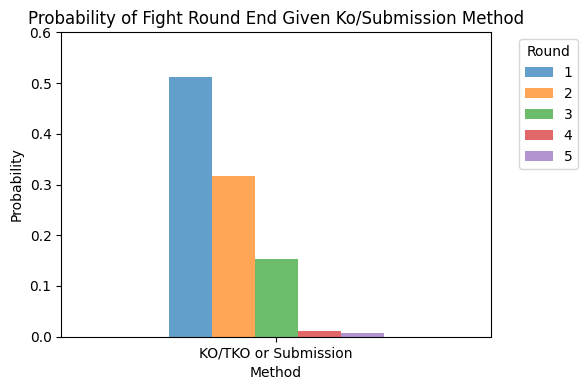

In [108]:
# Plotting
ax = df_ufc_events_ko_or_sub_conditional_probabilities.plot(kind='bar', stacked=False, figsize=(6, 4), alpha=0.7)

# Adding labels and title
ax.set_xlabel('Method')
ax.set_ylabel('Probability')
ax.set_ylim(0,0.6)
plt.xticks(rotation=0)
ax.set_title('Probability of Fight Round End Given Ko/Submission Method')
plt.legend(title='Round', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [109]:
# Calculate the count of each method
combined_method_counts = df_ufc_events['combined_method'].value_counts()

# Calculate the total number of occurrences
combined_method_total_count = df_ufc_events['combined_method'].count()

# Calculate the probability of each method
combined_method_probabilities = combined_method_counts / combined_method_total_count

combined_method_probabilities

combined_method
KO/TKO or Submission    0.528163
Decision                0.468923
Other                   0.002913
Name: count, dtype: float64

In [110]:
# Calculate the probability of rounds and methods happening
# Create a contingency table of method counts per round
df_ufc_events_contingency_table = pd.crosstab(df_ufc_events['combined_method'], df_ufc_events['finish_round'])

# Calculate the total count of each round
df_ufc_events_round_totals = df_ufc_events_contingency_table.sum(axis=1)

# Calculate the conditional probability of each method given the round
df_ufc_events_conditional_probabilities = df_ufc_events_contingency_table.div(df_ufc_events_round_totals, axis=0)

# Display the conditional probabilities
print(df_ufc_events_conditional_probabilities)

finish_round                 1         2         3         4         5
combined_method                                                       
Decision              0.000000  0.000000  0.928107  0.000000  0.071893
KO/TKO or Submission  0.511426  0.316785  0.152876  0.011032  0.007880
Other                 0.666667  0.142857  0.142857  0.047619  0.000000


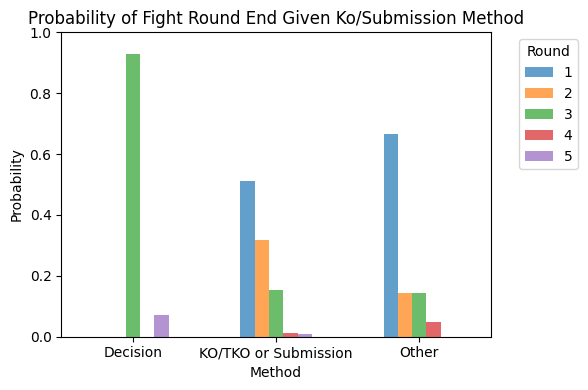

In [111]:
# Plotting
ax = df_ufc_events_conditional_probabilities.plot(kind='bar', stacked=False, figsize=(6, 4), alpha=0.7)

# Adding labels and title
ax.set_xlabel('Method')
ax.set_ylabel('Probability')
ax.set_ylim(0,1)
plt.xticks(rotation=0)
ax.set_title('Probability of Fight Round End Given Ko/Submission Method')
plt.legend(title='Round', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()